# Exercice 1 
A. Répondre par Vrai ou Faux en justifiant votre réponse

   1. Une liste en Python est un type de données immuable, ce qui signifie qu'on 
      ne peut pas modifier son contenu. 
Reponse:  Faux (Une liste en python peut etre modifiable)
     
   2. Les index dans un DataFrame Pandas sont toujours numériques.
reponse:faux (les index dans un dataframe pandas peuvent etre non numerique)

   3. L'utilisation de iloc dans Pandas permet d'accéder aux données en 
      utilisant des étiquettes. 
Reponse: Faux ( Iloc utilise des entiers )

   4. En Python, une variable peut changer de type après avoir été définie.
Reponse: Vrai ( Python est un type dynamique)
   
   5. Python est un langage de programmation interprété
Reponse: Vrai 


B.Repondre aux questions
  
  1.La difference est que une tuple est immuable, on peut modifier ces donnees alors que une liste est modifiable
  
  2.Iloc utilise des indices entiers loc utilise les etiquettes
  
  3.Une bibliotheque est un ensemble de de fonctions , classes et modules etendent les capacites du langage
    
  4.La difference est que une Series est comme une seule colonne tandisqu'une dataframe est un table entiere
  
  5.analyse descriptive ,diagnostique,predictive,prescriptive


In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('C:\\Users\\NZO BUSINESS\\Desktop\\all_data_2025.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
df.shape

(186850, 6)

In [5]:
df.tail(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"
186849,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301"


In [6]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
df['Order ID'].nunique()

178438

In [8]:
masque=df['Order ID']!='Order ID'

In [9]:
dfnew=df[masque]

In [10]:
dfnew.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [11]:
dfnew.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [12]:
dfnew=dfnew.dropna()

In [13]:
dfnew.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [14]:
dfnew['Quantity Ordered']=dfnew['Quantity Ordered'].astype('int')

In [15]:
dfnew['Order Date']=pd.to_datetime(dfnew['Order Date'])

C:\Users\NZO BUSINESS\AppData\Local\Temp\ipykernel_11244\3322872935.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfnew['Order Date']=pd.to_datetime(dfnew['Order Date'])


In [16]:
dfnew['Price Each ']=dfnew['Price Each'].astype('float')

In [17]:
dfnew['Order Date'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
186845     6
186846     6
186847     6
186848     6
186849     6
Name: Order Date, Length: 185950, dtype: int32

In [18]:
dfnew['mois']=dfnew['Order Date'].dt.month

In [19]:
dfnew.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Price Each ', 'mois'],
      dtype='object')

In [20]:
dfnew.groupby('mois')['Quantity Ordered'].sum().idxmax()

12

Matplotlib is building the font cache; this may take a moment.


<Axes: >

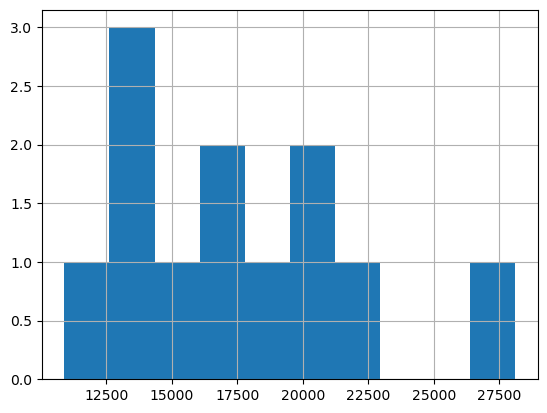

In [21]:
dfnew.groupby('mois')['Quantity Ordered'].sum().hist()

In [22]:
dfnew['Chiffres_Affaires']=dfnew['Quantity Ordered']*dfnew['Price Each']

In [23]:
dfnew['Chiffres_Affaires']

0           1700
1          600.0
2          11.95
3         149.99
4          11.95
           ...  
186845      2.99
186846    149.99
186847     11.95
186848     11.95
186849      2.99
Name: Chiffres_Affaires, Length: 185950, dtype: object

In [27]:
dfnew.groupby('mois')['Chiffres_Affaires'].sum().idxmax()

TypeError: reduction operation 'argmax' not allowed for this dtype

In [28]:
dfnew.groupby('mois')['Chiffres_Affaires'].sum().max()

'7003.84389.9914.953.843.8414.953.8415011.9511.9599.9999.99149.9915014.9511.99170070011.993.843.84300109.99600.011.99109.992.9911.952.992.993.843.843.843.84999.9911.9511.952.992.992.9911.9911.991503.843.841503.8411.9914.9517002.992.991700700999.99389.9911.99379.993.84149.9914.953.843.8411.9915015011.99389.9970011.9511.99149.9915011.993.843.843.8411.9914.95149.9915014.953.8499.993.8411.9511.953.843.8470014.95149.992.9911.9515014.952.992.993001502.992.9911.9599.9911.9511.952.9911.9511.99109.993.842.992.9915011.953.8411.953.8414.95999.9911.95149.992.9911.953.843.843.84149.99389.9960011.9511.9511.951503.84379.99700379.992.993.843.8411.9514.9514.953.84150109.9911.9911.9911.9570011.951503.8414.9514.954002.9914.9515099.99389.99149.99109.99389.99149.9999.9960011.952.99149.9911.992.99149.992.9911.95389.99149.9911.9911.992.99999.992.992.9911.9911.9511.997003.8499.9911.9599.9960011.9511.9914.95149.99999.993.8499.9970011.9511.95150149.99379.9914.9514.9570011.9960011.992.993.84109.9999.9911.991503.